# Data Analysis 101 - Pandas

Alex Chen

Source:

https://github.com/allisonhorst/palmerpenguins/tree/main

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 讀入資料

In [2]:
df1 = pd.read_csv('penguins_info.csv')

In [3]:
df2 = pd.read_excel('penguins_measurements.xlsx')

# 2. 資料概覽

In [4]:
df1 # 直接輸入 df1 可檢視資料

,ID,Species,Island,Sex
0,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE
1,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
2,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
3,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN
4,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
...,...,...,...,...
339,340,Gentoo penguin (Pygoscelis papua),Biscoe,NaN
340,341,Gentoo penguin (Pygoscelis papua),Biscoe,FEMALE
341,342,Gentoo penguin (Pygoscelis papua),Biscoe,MALE
342,343,Gentoo penguin (Pygoscelis papua),Biscoe,FEMALE


In [5]:
df1.head() # 顯示前五筆資料

,ID,Species,Island,Sex
0,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE
1,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
2,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
3,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN
4,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE


In [6]:
df1.shape # 顯示資料筆數與欄位數

(344, 4)

In [7]:
df1.columns # 顯示欄位名稱

Index(['ID', 'Species', 'Island', 'Sex'], dtype='object')

In [8]:
df1.describe() # 數值型資料的描述性統計

,ID
count,344.000000
mean,172.500000
std,99.448479
min,1.000000
25%,86.750000
50%,172.500000
75%,258.250000
max,344.000000


In [9]:
df1.info() # 資料的資訊

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       344 non-null    int64 
 1   Species  344 non-null    object
 2   Island   344 non-null    object
 3   Sex      334 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.9+ KB


In [10]:
df1.dtypes # 欄位的資料型態

ID          int64
Species    object
Island     object
Sex        object
dtype: object

In [11]:
df1['Species'].value_counts() # 類別型資料的計數

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [12]:
df2.head()

,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,3,40.3,18.0,195.0,3250.0
3,4,NaN,NaN,NaN,NaN
4,5,36.7,19.3,193.0,3450.0


In [13]:
df2.dtypes

ID                       int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
dtype: object

In [14]:
df2['Body Mass (g)'].min()

np.float64(2700.0)

In [15]:
df2['Body Mass (g)'].max()

np.float64(6300.0)

In [16]:
df2['Body Mass (g)'].mean()

np.float64(4201.754385964912)

In [17]:
df2['Body Mass (g)'].std()

np.float64(801.9545356980956)

In [18]:
df2['Body Mass (g)'].median()

np.float64(4050.0)

# 3. 資料搜索

In [19]:
df2['Culmen Depth (mm)']

0      18.7
1      17.4
2      18.0
3       NaN
4      19.3
       ... 
339     NaN
340    14.3
341    15.7
342    14.8
343    16.1
Name: Culmen Depth (mm), Length: 344, dtype: float64

In [20]:
df2[['Culmen Depth (mm)', 'Body Mass (g)']]

,Culmen Depth (mm),Body Mass (g)
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
3,NaN,NaN
4,19.3,3450.0
...,...,...
339,NaN,NaN
340,14.3,4850.0
341,15.7,5750.0
342,14.8,5200.0


In [21]:
df2.loc[1, 'Culmen Depth (mm)']

np.float64(17.4)

In [22]:
df2.loc[1, ['Culmen Depth (mm)', 'Body Mass (g)']]

Culmen Depth (mm)      17.4
Body Mass (g)        3800.0
Name: 1, dtype: float64

In [23]:
df2.loc[[1, 4], ['Culmen Depth (mm)', 'Body Mass (g)']]

,Culmen Depth (mm),Body Mass (g)
1,17.4,3800.0
4,19.3,3450.0


In [24]:
df2.loc[df2['Body Mass (g)'] >= 6000, ['Culmen Depth (mm)', 'Body Mass (g)']]

,Culmen Depth (mm),Body Mass (g)
237,15.2,6300.0
253,17.0,6050.0
297,16.3,6000.0
337,16.2,6000.0


In [25]:
df2.head()

,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,3,40.3,18.0,195.0,3250.0
3,4,NaN,NaN,NaN,NaN
4,5,36.7,19.3,193.0,3450.0


In [26]:
df2.iloc[1, 2]

np.float64(17.4)

In [27]:
df2.iloc[1, [2, 4]]

Culmen Depth (mm)      17.4
Body Mass (g)        3800.0
Name: 1, dtype: float64

# 4. 資料清理與修改

In [28]:
df_temp = df2.drop(['Culmen Length (mm)', 'Culmen Depth (mm)'], axis=1)

In [29]:
df_temp.head()

,ID,Flipper Length (mm),Body Mass (g)
0,1,181.0,3750.0
1,2,186.0,3800.0
2,3,195.0,3250.0
3,4,NaN,NaN
4,5,193.0,3450.0


In [30]:
df_temp.loc[1, 'ID']

np.int64(2)

In [31]:
df_temp.loc[1, 'ID'] = 1

In [32]:
df_temp.head()

,ID,Flipper Length (mm),Body Mass (g)
0,1,181.0,3750.0
1,1,186.0,3800.0
2,3,195.0,3250.0
3,4,NaN,NaN
4,5,193.0,3450.0


In [33]:
df_temp.loc[1, ['Flipper Length (mm)', 'Body Mass (g)']] = [181.0, 3750.0]

In [34]:
df_temp.head()

,ID,Flipper Length (mm),Body Mass (g)
0,1,181.0,3750.0
1,1,181.0,3750.0
2,3,195.0,3250.0
3,4,NaN,NaN
4,5,193.0,3450.0


In [35]:
df_temp2 = df_temp.drop_duplicates()

In [36]:
df_temp2.head()

,ID,Flipper Length (mm),Body Mass (g)
0,1,181.0,3750.0
2,3,195.0,3250.0
3,4,NaN,NaN
4,5,193.0,3450.0
5,6,190.0,3650.0


In [37]:
print('清理前資料筆數:', df_temp.shape[0], '\n清理後資料筆數:', df_temp2.shape[0])

清理前資料筆數: 344 
清理後資料筆數: 343


In [38]:
df2.isna().any(axis=0)

ID                     False
Culmen Length (mm)      True
Culmen Depth (mm)       True
Flipper Length (mm)     True
Body Mass (g)           True
dtype: bool

In [39]:
df2.isna().sum(axis=0) # 欄位缺失值的計數

ID                     0
Culmen Length (mm)     2
Culmen Depth (mm)      2
Flipper Length (mm)    2
Body Mass (g)          2
dtype: int64

In [40]:
df2.loc[df2.isna().any(axis=1), :]

,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
3,4,NaN,NaN,NaN,NaN
339,340,NaN,NaN,NaN,NaN


In [41]:
df2 = df2.dropna()

In [42]:
df1.isna().any(axis=0)

ID         False
Species    False
Island     False
Sex         True
dtype: bool

In [43]:
df1.Sex.value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [44]:
df1.isna().sum(axis=0)

ID          0
Species     0
Island      0
Sex        10
dtype: int64

In [45]:
df1 = df1.dropna()

In [46]:
df1.Sex.value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [47]:
df1.loc[df1.Sex == '.', :]

,ID,Species,Island,Sex
336,337,Gentoo penguin (Pygoscelis papua),Biscoe,.


In [48]:
df1 = df1.drop(df1[df1.Sex == '.'].index, axis=0)

In [49]:
df1.Sex.value_counts()

Sex
MALE      168
FEMALE    165
Name: count, dtype: int64

# 5. 資料合併

In [50]:
df1.head()

,ID,Species,Island,Sex
0,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE
1,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
2,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
4,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE
5,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE


In [51]:
df1.shape

(333, 4)

In [52]:
df2.head()

,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,3,40.3,18.0,195.0,3250.0
4,5,36.7,19.3,193.0,3450.0
5,6,39.3,20.6,190.0,3650.0


In [53]:
df2.shape

(342, 5)

In [54]:
df_m1 = pd.merge(df1, df2, on='ID')

In [55]:
df_m1.head()

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,39.1,18.7,181.0,3750.0
1,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,40.3,18.0,195.0,3250.0
3,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,36.7,19.3,193.0,3450.0
4,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,39.3,20.6,190.0,3650.0


In [56]:
df_m1.shape

(333, 8)

In [69]:
df_m2 = pd.merge(df1, df2, on='ID', how='right')

In [70]:
df_m2.head()

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,39.1,18.7,181.0,3750.0
1,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,40.3,18.0,195.0,3250.0
3,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,36.7,19.3,193.0,3450.0
4,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,39.3,20.6,190.0,3650.0


In [71]:
df_m2.shape

(342, 8)

In [60]:
df_m3 = pd.concat([df1, df2], axis=1)

In [61]:
df_m3.head()

,ID,Species,Island,Sex,ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1.0,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,1,39.1,18.7,181.0,3750.0
1,2.0,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,2,39.5,17.4,186.0,3800.0
2,3.0,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,3,40.3,18.0,195.0,3250.0
4,5.0,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,5,36.7,19.3,193.0,3450.0
5,6.0,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,6,39.3,20.6,190.0,3650.0


In [62]:
df_m3.shape

(342, 9)

In [63]:
df = pd.merge(df1, df2, on='ID')

# 6. 資料聚合

In [64]:
df.head()

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,39.1,18.7,181.0,3750.0
1,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,40.3,18.0,195.0,3250.0
3,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,36.7,19.3,193.0,3450.0
4,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,39.3,20.6,190.0,3650.0


In [65]:
df.groupby('Species')['Body Mass (g)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          3706.164384
Chinstrap penguin (Pygoscelis antarctica)    3733.088235
Gentoo penguin (Pygoscelis papua)            5092.436975
Name: Body Mass (g), dtype: float64

In [66]:
df.groupby('Species')['Body Mass (g)'].agg(['mean', 'std'])

,mean,std
Species,,
Adelie Penguin (Pygoscelis adeliae),3706.164384,458.620135
Chinstrap penguin (Pygoscelis antarctica),3733.088235,384.335081
Gentoo penguin (Pygoscelis papua),5092.436975,501.476154


In [72]:
df.groupby(['Species', 'Sex'], as_index=False)['Body Mass (g)'].mean()

,Species,Sex,Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,3368.835616
1,Adelie Penguin (Pygoscelis adeliae),MALE,4043.493151
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,3527.205882
3,Chinstrap penguin (Pygoscelis antarctica),MALE,3938.970588
4,Gentoo penguin (Pygoscelis papua),FEMALE,4679.741379
5,Gentoo penguin (Pygoscelis papua),MALE,5484.836066


In [75]:
df.groupby(['Species', 'Sex'], as_index=False)[['Body Mass (g)', 'Culmen Length (mm)']].agg(['mean', 'std'])

Species     Sex Body Mass (g)  \
                                                              mean   
0        Adelie Penguin (Pygoscelis adeliae)  FEMALE   3368.835616   
1        Adelie Penguin (Pygoscelis adeliae)    MALE   4043.493151   
2  Chinstrap penguin (Pygoscelis antarctica)  FEMALE   3527.205882   
3  Chinstrap penguin (Pygoscelis antarctica)    MALE   3938.970588   
4          Gentoo penguin (Pygoscelis papua)  FEMALE   4679.741379   
5          Gentoo penguin (Pygoscelis papua)    MALE   5484.836066   

              Culmen Length (mm)            
          std               mean       std  
0  269.380102          37.257534  2.028883  
1  346.811553          40.390411  2.277131  
2  285.333912          46.573529  3.108669  
3  362.137550          51.094118  1.564558  
4  281.578294          45.563793  2.051247  
5  313.158596          49.473770  2.720594

In [76]:
df.groupby(['Species', 'Sex'], as_index=False).agg({'Body Mass (g)': ['mean', 'std'], 'Culmen Length (mm)': ['min', 'max']})

Species     Sex Body Mass (g)  \
                                                              mean   
0        Adelie Penguin (Pygoscelis adeliae)  FEMALE   3368.835616   
1        Adelie Penguin (Pygoscelis adeliae)    MALE   4043.493151   
2  Chinstrap penguin (Pygoscelis antarctica)  FEMALE   3527.205882   
3  Chinstrap penguin (Pygoscelis antarctica)    MALE   3938.970588   
4          Gentoo penguin (Pygoscelis papua)  FEMALE   4679.741379   
5          Gentoo penguin (Pygoscelis papua)    MALE   5484.836066   

              Culmen Length (mm)        
          std                min   max  
0  269.380102               32.1  42.2  
1  346.811553               34.6  46.0  
2  285.333912               40.9  58.0  
3  362.137550               48.5  55.8  
4  281.578294               40.9  50.5  
5  313.158596               44.4  59.6

# 7. 資料排序

In [77]:
df.head()

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,39.1,18.7,181.0,3750.0
1,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,39.5,17.4,186.0,3800.0
2,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,40.3,18.0,195.0,3250.0
3,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,36.7,19.3,193.0,3450.0
4,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,39.3,20.6,190.0,3650.0


In [78]:
df.sort_values('Body Mass (g)', ascending=False)

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
231,238,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,49.2,15.2,221.0,6300.0
246,254,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,59.6,17.0,230.0,6050.0
289,298,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,51.1,16.3,220.0,6000.0
327,338,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,48.8,16.2,222.0,6000.0
291,300,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,45.2,16.4,223.0,5950.0
...,...,...,...,...,...,...,...,...
92,99,Adelie Penguin (Pygoscelis adeliae),Dream,FEMALE,33.1,16.1,178.0,2900.0
48,55,Adelie Penguin (Pygoscelis adeliae),Biscoe,FEMALE,34.5,18.1,187.0,2900.0
52,59,Adelie Penguin (Pygoscelis adeliae),Biscoe,FEMALE,36.5,16.6,181.0,2850.0
58,65,Adelie Penguin (Pygoscelis adeliae),Biscoe,FEMALE,36.4,17.1,184.0,2850.0


In [82]:
df.sort_values(['Body Mass (g)', 'Flipper Length (mm)'], ascending=[True, False])

,ID,Species,Island,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
184,191,Chinstrap penguin (Pygoscelis antarctica),Dream,FEMALE,46.9,16.6,192.0,2700.0
58,65,Adelie Penguin (Pygoscelis adeliae),Biscoe,FEMALE,36.4,17.1,184.0,2850.0
52,59,Adelie Penguin (Pygoscelis adeliae),Biscoe,FEMALE,36.5,16.6,181.0,2850.0
110,117,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,38.6,17.0,188.0,2900.0
48,55,Adelie Penguin (Pygoscelis adeliae),Biscoe,FEMALE,34.5,18.1,187.0,2900.0
...,...,...,...,...,...,...,...,...
291,300,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,45.2,16.4,223.0,5950.0
327,338,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,48.8,16.2,222.0,6000.0
289,298,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,51.1,16.3,220.0,6000.0
246,254,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,59.6,17.0,230.0,6050.0


# 8. 資料視覺化

<Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

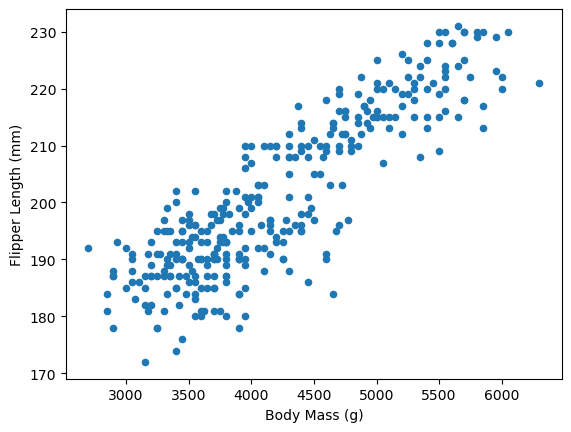

In [83]:
df.plot(kind='scatter', x='Body Mass (g)', y='Flipper Length (mm)')

array([[<Axes: title={'center': 'Body Mass (g)'}>]], dtype=object)

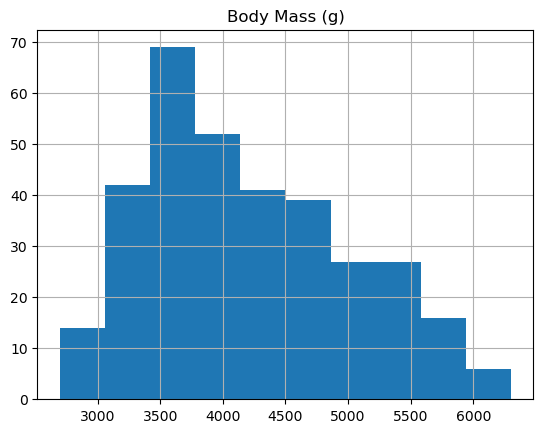

In [84]:
df.hist('Body Mass (g)')

<Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

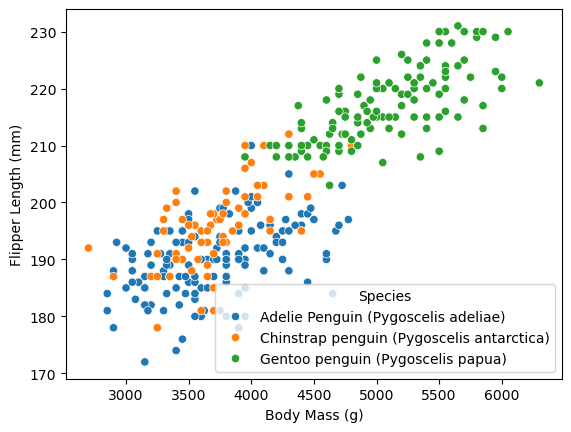

In [85]:
sns.scatterplot(data=df, x='Body Mass (g)', y='Flipper Length (mm)', hue='Species')

<Axes: xlabel='Body Mass (g)', ylabel='Count'>

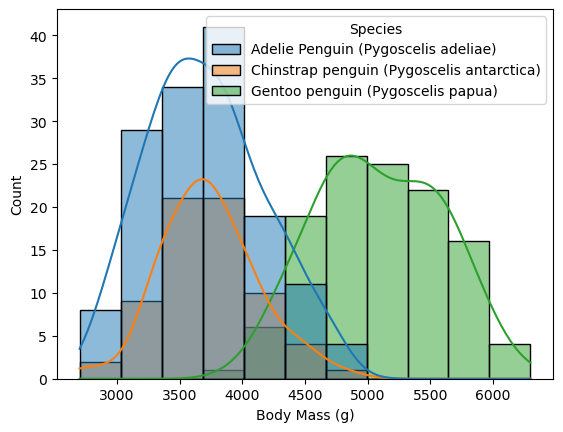

In [86]:
sns.histplot(data=df, x='Body Mass (g)', hue='Species', kde=True)

# 9. 資料匯出

In [87]:
# df.to_csv('final_penguins.csv', index=False)

In [88]:
# df.to_excel('final_penguins.xlsx', index=False)